## AdaBoost

Accuracy: 0.33682422870082085
Confusion matrix:
[[  70   13   42  404  188  155   88]
 [   3    4    6   51   15   15   17]
 [  54   11   66  391  170  153  173]
 [  40   13   49 1188  216  188  131]
 [  39   16   32  452  411  166  100]
 [  55   16   48  423  225  277   95]
 [  19    5   50  179  113   67  364]]


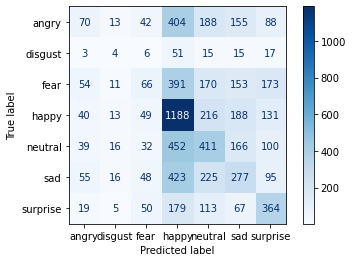

Classification report:
              precision    recall  f1-score   support

       angry       0.25      0.07      0.11       960
     disgust       0.05      0.04      0.04       111
        fear       0.23      0.06      0.10      1018
       happy       0.38      0.65      0.48      1825
     neutral       0.31      0.34      0.32      1216
         sad       0.27      0.24      0.26      1139
    surprise       0.38      0.46      0.41       797

    accuracy                           0.34      7066
   macro avg       0.27      0.27      0.25      7066
weighted avg       0.31      0.34      0.30      7066



In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the emotions and their corresponding labels
emotions = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Define the paths to the training and validation directories
train_dir = '../datasets/train/'
val_dir = '../datasets/validation/'

# Define the image size
img_size = (48, 48)

# Load the training data
X_train = []
y_train = []
for emotion, label in emotions.items():
    for filename in os.listdir(train_dir + emotion):
        img = Image.open(train_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_train.append(np.array(img).flatten())
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load the validation data
X_val = []
y_val = []
for emotion, label in emotions.items():
    for filename in os.listdir(val_dir + emotion):
        img = Image.open(val_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_val.append(np.array(img).flatten())
        y_val.append(label)

X_val = np.array(X_val)
y_val = np.array(y_val)

# Create a logistic regression model
model = AdaBoostClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)

plot_confusion_matrix(model, X_val, y_val, display_labels=emotions, cmap=plt.cm.Blues)
plt.show()

# Calculate the classification report of the model
cr = classification_report(y_val, y_pred, target_names=emotions.keys())
print('Classification report:')
print(cr)